### Task 6: Threshold Tuning and Probability Interpretation

● Predict the probability of the positive class.

● Change the threshold (e.g., 0.3, 0.5, 0.7) and observe how the confusion matrix and F1-score change.

● Plot the ROC curve and mark optimal threshold.

In [1]:
# Load data and train model

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [2]:
# Predict probabilities and evaluation

import numpy as np
from sklearn.metrics import confusion_matrix, f1_score

y_probs = model.predict_proba(X_test)[:, 1]  # positive class probabilities

def evaluate_threshold(threshold):
    y_pred_thresh = (y_probs >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    print(f"Threshold: {threshold}")
    print("Confusion Matrix:")
    print(cm)
    print(f"F1-score: {f1:.4f}\n")

thresholds = [0.3, 0.5, 0.7]
for t in thresholds:
    evaluate_threshold(t)


Threshold: 0.3
Confusion Matrix:
[[39  4]
 [ 1 70]]
F1-score: 0.9655

Threshold: 0.5
Confusion Matrix:
[[39  4]
 [ 1 70]]
F1-score: 0.9655

Threshold: 0.7
Confusion Matrix:
[[41  2]
 [ 1 70]]
F1-score: 0.9790



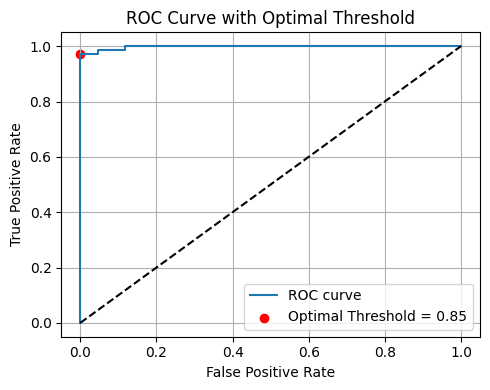

Optimal threshold: 0.8505


In [5]:
# Plot ROC curve and mark optimal threshold

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Optimal Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Optimal threshold: {optimal_threshold:.4f}")